# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

In this project based on the Indian and Southeast Asian market, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

The requirement of the project:
1. To predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.
2. To identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

# Telecom Churn Case Study

The keys sections in this data analysis are:

1. Reading and understanding the data
2. Cleaning the data
3. Exploratory data analysis
4. Preparing the data for modelling
5. Modelling without PCA
6. Modelling with PCA

## Reading and understanding the data

### Importing the data

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 500)
!pip install --upgrade scikit-learn
!pip  install --upgrade imbalanced-learn
!pip install six
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 6.9MB 2.8MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 163kB 2.7MB/s 
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import os
%cd /gdrive/My\ Drive

/gdrive/My Drive


In [0]:
data = pd.read_csv('telecom_churn_data.csv') #the path will be used to read the file
data.head() #checking if data from the csv file is loading properly

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

### Checking the structure of the data

In [0]:
data.shape

(99999, 226)

In [0]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [0]:
cols = data.columns.tolist()
cols

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [0]:
data.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

The telecom churn data that has been provided contains 99,999 rows and 226 columns.

The columns in this dataset are:
'mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_og_mou_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_og_mou_9', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'spl_og_mou_9', 'og_others_6', 'og_others_7', 'og_others_8', 'og_others_9', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_9', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'loc_ic_mou_9', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'std_ic_mou_9', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'vol_3g_mb_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', and 'sep_vbc_3g'.

In [0]:
data.describe(percentiles=[0.001,0.01,0.1,0.98,0.99,0.999])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

### Segregating the high-value customers

In [0]:
data["avg_rech_amt_6_7"] = data['total_rech_amt_6'] + data['total_rech_amt_7']
hvc = np.percentile(data["avg_rech_amt_6_7"], 70)
telecom = data.loc[data.avg_rech_amt_6_7 >= hvc]
telecom.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.00,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.4

In [0]:
telecom["avg_rech_amt_6_7"].isnull().sum()

0

In [0]:
telecom.shape

(30011, 227)

Now, we have more than 30,000 rows left for analysis.

## Cleaning the data

In [0]:
#formatting the date columns
datecol= [i for i in telecom.columns if "date" in i]

for i in datecol:
    telecom[i]=pd.to_datetime(telecom.loc[telecom[i].notnull()][i], format="%m/%d/%Y")

### Checking columns with high missing values

In [0]:
telecom.isnull().values.any() #checking if missing values are present in dataset

True

In [0]:
round(100*(telecom.isnull().sum())/len(telecom), 2) #percentage of missing values by column

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.38
std_og_t2o_mou               0.38
loc_ic_t2o_mou               0.38
last_date_of_month_6         0.00
last_date_of_month_7         0.10
last_date_of_month_8         0.52
last_date_of_month_9         1.20
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.05
onnet_mou_7                  1.01
onnet_mou_8                  3.13
onnet_mou_9                  5.68
offnet_mou_6                 1.05
offnet_mou_7                 1.01
offnet_mou_8                 3.13
offnet_mou_9                 5.68
roam_ic_mou_6                1.05
roam_ic_mou_7                1.01
roam_ic_mou_8                3.13
roam_ic_mou_9                5.68
roam_og_mou_6                1.05
roam_og_mou_7                1.01
roam_og_mou_8                3.13
roam_og_mou_9                5.68
loc_og_t2t_mou

In [0]:
null_cols = telecom.columns[telecom.isnull().mean() > .6].to_list() #columns with more than 60% of missing values
print(len(null_cols))
print(null_cols)

40
['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


Here, we can see that 40 columns contain a high percentage of missing data (above 60%)

### Dropping unncessary columns


In [0]:
telecom.shape

(30011, 227)

In [0]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
count,3.001100e+04,30011.0,29897.0,29897.0,29897.0,30011.000000,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.0,29708.0,29073.0,28307.0,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,2

In [0]:
round(100*(telecom.isnull().sum())/len(telecom), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.38
std_og_t2o_mou               0.38
loc_ic_t2o_mou               0.38
last_date_of_month_6         0.00
last_date_of_month_7         0.10
last_date_of_month_8         0.52
last_date_of_month_9         1.20
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.05
onnet_mou_7                  1.01
onnet_mou_8                  3.13
onnet_mou_9                  5.68
offnet_mou_6                 1.05
offnet_mou_7                 1.01
offnet_mou_8                 3.13
offnet_mou_9                 5.68
roam_ic_mou_6                1.05
roam_ic_mou_7                1.01
roam_ic_mou_8                3.13
roam_ic_mou_9                5.68
roam_og_mou_6                1.05
roam_og_mou_7                1.01
roam_og_mou_8                3.13
roam_og_mou_9                5.68
loc_og_t2t_mou

In [0]:
telecom['circle_id'].value_counts()

109    30011
Name: circle_id, dtype: int64

In [0]:
telecom['loc_og_t2o_mou'].value_counts()

0.0    29897
Name: loc_og_t2o_mou, dtype: int64

In [0]:
telecom['std_og_t2o_mou'].value_counts()

0.0    29897
Name: std_og_t2o_mou, dtype: int64

In [0]:
telecom['loc_ic_t2o_mou'].value_counts()

0.0    29897
Name: loc_ic_t2o_mou, dtype: int64

In [0]:
telecom['last_date_of_month_6'].value_counts()

2014-06-30    30011
Name: last_date_of_month_6, dtype: int64

In [0]:
telecom['last_date_of_month_7'].value_counts()

2014-07-31    29980
Name: last_date_of_month_7, dtype: int64

In [0]:
telecom['last_date_of_month_8'].value_counts()

2014-08-31    29854
Name: last_date_of_month_8, dtype: int64

In [0]:
telecom['last_date_of_month_9'].value_counts()

2014-09-30    29651
Name: last_date_of_month_9, dtype: int64

In [0]:
# renaming some columns for convenience
telecom['vbc_3g_8'] = telecom['aug_vbc_3g']
telecom['vbc_3g_7'] = telecom['jul_vbc_3g']
telecom['vbc_3g_6'] = telecom['jun_vbc_3g']
telecom['vbc_3g_9'] = telecom['sep_vbc_3g']
telecom = telecom.drop(['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g'], axis=1)

In [0]:
drop_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','circle_id',
             'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']
telecom_new = telecom.drop(drop_cols, axis = 1)
telecom_new.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,avg_rech_amt_6_7,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.00,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1

In [0]:
telecom_new.shape

(30011, 219)

The columns 'circle_id','loc_og_t2o_mou','std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', and 'last_date_of_month_9' contained only one value for all columns. Hence, they have been removed from the dataset as they will not offer any insight during the analysis. Now, we have 219 columns.

### Treating missing values

In [0]:
telecom_new.dtypes

mobile_number                        int64
arpu_6                             float64
arpu_7                             float64
arpu_8                             float64
arpu_9                             float64
onnet_mou_6                        float64
onnet_mou_7                        float64
onnet_mou_8                        float64
onnet_mou_9                        float64
offnet_mou_6                       float64
offnet_mou_7                       float64
offnet_mou_8                       float64
offnet_mou_9                       float64
roam_ic_mou_6                      float64
roam_ic_mou_7                      float64
roam_ic_mou_8                      float64
roam_ic_mou_9                      float64
roam_og_mou_6                      float64
roam_og_mou_7                      float64
roam_og_mou_8                      float64
roam_og_mou_9                      float64
loc_og_t2t_mou_6                   float64
loc_og_t2t_mou_7                   float64
loc_og_t2t_

In [0]:
#creating lists with column names with same type of data

date_cols = [i for i in telecom_new.columns if 'date' in i]

cat_cols = ['fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
            'night_pck_user_9']

num_cols = [x for x in telecom_new.columns if x not in cat_cols + date_cols]
num_cols.remove('mobile_number')

print("Number of date columns: %d \nNumber of categorical columns: %d \nNumber of numeric columns: %d" % (len(date_cols), len(cat_cols), len(num_cols)))

print(len(date_cols) + len(cat_cols) + len(num_cols) +1 == telecom_new.shape[1]) #checking if all columns of dataset are categorised

Number of date columns: 8 
Number of categorical columns: 8 
Number of numeric columns: 202
True


In [0]:
#numerical columns containing recharge details
rech_cols = [i for i in telecom_new.columns if i in num_cols if 'rech' in i]
rech_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'avg_rech_amt_6_7']

In [0]:
#imputing missing values in recharge columns with 0 assuming the customer has not done any recharge
telecom_imputed = telecom_new.copy()
telecom_imputed[rech_cols] = telecom_imputed[rech_cols].fillna(0)
telecom_imputed[rech_cols].head(10)

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,avg_rech_amt_6_7
7,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2370
8,19,21,14,15,437,601,120,186,90,154,30,36,0.0,2.0,3.0,0.0,0.0,154.0,23.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,1038
13,6,4,11,7,507,253,717,353,110,110,130,130,0.0,0.0,3.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,760
16,10,6,2,1,570,348,160,220,110,110,130,220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918
17,19,2,4,10,816,0,30,335,110,0,30,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,816
21,22,26,27,17,600,680,718,680,50,50,50,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1280
24,5,5,7,6,440,330,490,421,110,110,130,250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,770
33,7,14,1,6,1058,2806,455,1007,252,1255,455,655,5.0,8.0,1.0,2.0,252.0,1255.0,455.0,655.0,0.0,0.0,0.0,0.0,5.0,8.0,1.0,2.0,1057.0,2553.0,455.0,907.0,3864
38,27,22,6,15,420,636,416,487,30,110,130,130,0.0,0.0,0.0,3.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,1056
41,4,4,3,1,496,510,410,130,150,150,150,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1006


In [0]:
#creating a new category for the missing data in the categorical columns
telecom_imputed[cat_cols] = telecom_imputed[cat_cols].fillna(-1)
telecom_imputed[cat_cols].head(10)

,fb_user_6,fb_user_7,fb_user_8,fb_user_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9
7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,-1.0,1.0,1.0,-1.0,-1.0,0.0,0.0,-1.0
13,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,0.0,-1.0
16,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
17,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
21,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
24,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
33,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
38,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,0.0
41,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [0]:
#checking percentage of missing data in each column
round(100*(telecom_imputed.isnull().sum())/len(telecom_imputed), 2)

mobile_number                0.00
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.05
onnet_mou_7                  1.01
onnet_mou_8                  3.13
onnet_mou_9                  5.68
offnet_mou_6                 1.05
offnet_mou_7                 1.01
offnet_mou_8                 3.13
offnet_mou_9                 5.68
roam_ic_mou_6                1.05
roam_ic_mou_7                1.01
roam_ic_mou_8                3.13
roam_ic_mou_9                5.68
roam_og_mou_6                1.05
roam_og_mou_7                1.01
roam_og_mou_8                3.13
roam_og_mou_9                5.68
loc_og_t2t_mou_6             1.05
loc_og_t2t_mou_7             1.01
loc_og_t2t_mou_8             3.13
loc_og_t2t_mou_9             5.68
loc_og_t2m_mou_6             1.05
loc_og_t2m_mou_7             1.01
loc_og_t2m_mou_8             3.13
loc_og_t2m_mou_9             5.68
loc_og_t2f_mou

In [0]:
#dropping columns with extremely high percentage of missing data (more than 60%)
telecom_imputed = telecom_imputed.loc[:, telecom_imputed.isnull().mean() < .6]
round(100*(telecom_imputed.isnull().sum())/len(telecom_imputed), 2).sort_values(ascending=False)

spl_ic_mou_9           5.68
std_ic_t2o_mou_9       5.68
roam_og_mou_9          5.68
loc_og_t2t_mou_9       5.68
isd_ic_mou_9           5.68
ic_others_9            5.68
loc_og_t2m_mou_9       5.68
og_others_9            5.68
spl_og_mou_9           5.68
loc_og_t2f_mou_9       5.68
isd_og_mou_9           5.68
loc_og_t2c_mou_9       5.68
std_og_mou_9           5.68
std_og_t2c_mou_9       5.68
loc_og_mou_9           5.68
std_og_t2f_mou_9       5.68
std_og_t2t_mou_9       5.68
std_ic_mou_9           5.68
std_og_t2m_mou_9       5.68
onnet_mou_9            5.68
std_ic_t2m_mou_9       5.68
roam_ic_mou_9          5.68
loc_ic_t2f_mou_9       5.68
std_ic_t2t_mou_9       5.68
offnet_mou_9           5.68
loc_ic_t2m_mou_9       5.68
std_ic_t2f_mou_9       5.68
loc_ic_t2t_mou_9       5.68
loc_ic_mou_9           5.68
isd_og_mou_8           3.13
std_og_t2c_mou_8       3.13
loc_ic_t2f_mou_8       3.13
loc_ic_t2m_mou_8       3.13
std_og_mou_8           3.13
std_og_t2f_mou_8       3.13
loc_ic_mou_8        

In [0]:
#imputing the remaining missing values except the date and and 'mobile_number' columns 
telecom_df = telecom_imputed.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9','mobile_number'], axis=1)
telecom_df.head(10)

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,avg_rech_amt_6_7,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.00,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,802,2370,57.74,19.38,18.74,0.0
8,378.721,492.223,137.362,166.787,413.69,351.03

In [0]:
#imputing the missing values for the rest of the columns
from sklearn.impute import KNNImputer
temp = telecom_df.copy()
impute = KNNImputer(n_neighbors=100)
telecom_df[:] = impute.fit_transform(temp)

In [0]:
round(100*(telecom_df.isnull().sum())/len(telecom_df), 2)

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8

In [0]:
#adding the date columns and the mobile_number column to the imputed data
telecom_imputed[telecom_df.columns]=telecom_df
telecom_imputed.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,avg_rech_amt_6_7,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,102.8337,453.43,567.16,325.91,302.1182,16.23,33.49,31.64,36.9883,23.74,12.59,38.06,20.8296,51.39,31.38,40.28,80.918,308.63,447.38,162.28,191.9604,62.13,55.14,53.23,20.357,0.0,0.0,0.00,1.1304,422.16,533.91,255.79,293.2466,4.30,23.29,12.01,17.5877,49.89,31.76,49.14,44.0877,6.66,20.08,16.68,7.4526,0.0,0.0,0.0,0.0,60.86,75.14,77.84,69.1323,0.0,0.18,10.01,23.109,4.50,0.00,6.50,4.2756,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,61.2372,217.56,221.49,121.19,159.2861,152.16,101.46,39.53,31.0281,427.88,355.23,188.04,251.5616,36.89,11.83,30.39,13.0346,91.44,126.99,141.33,31.8651,52.19,34.24,22.21,4.9272,0.0,0.0,0.0,0.0,180.54,173.08,193.94,49.8311,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0293,2.06,14.53,31.59,18.5826,15.74,15.19,15.14,0.225,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,2014-06-27,2014-07-25,2014-08-26,2014-09-30,0.0,0.0,

In [0]:
round(100*(telecom_imputed.isnull().sum())/len(telecom_imputed), 2).sort_values(ascending=False)

date_of_last_rech_9    2.89
date_of_last_rech_8    1.98
date_of_last_rech_7    0.38
date_of_last_rech_6    0.21
vbc_3g_9               0.00
isd_og_mou_8           0.00
og_others_9            0.00
og_others_8            0.00
og_others_7            0.00
og_others_6            0.00
spl_og_mou_9           0.00
spl_og_mou_8           0.00
spl_og_mou_7           0.00
spl_og_mou_6           0.00
isd_og_mou_9           0.00
isd_og_mou_6           0.00
isd_og_mou_7           0.00
std_og_t2f_mou_9       0.00
std_og_mou_9           0.00
std_og_mou_8           0.00
std_og_mou_7           0.00
std_og_mou_6           0.00
std_og_t2c_mou_9       0.00
std_og_t2c_mou_8       0.00
std_og_t2c_mou_7       0.00
total_og_mou_6         0.00
total_og_mou_7         0.00
total_og_mou_8         0.00
loc_ic_t2f_mou_9       0.00
std_ic_t2m_mou_7       0.00
std_ic_t2m_mou_6       0.00
std_ic_t2t_mou_9       0.00
std_ic_t2t_mou_8       0.00
std_ic_t2t_mou_7       0.00
std_ic_t2t_mou_6       0.00
loc_ic_mou_9        

Now, we can see that all the missing data is handled except for the 4 date columns - date_of_last_rech_9, date_of_last_rech_8, date_of_last_rech_6, date_of_last_rech_7. We can drop these columns as they might not offer much insight.

In [0]:
telecom_cleaned = telecom_imputed.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'], axis=1)
round(100*(telecom_cleaned.isnull().sum())/len(telecom_cleaned), 2)

mobile_number         0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7

In [0]:
telecom_cleaned.shape

(30011, 203)

### Creating target variable

In [0]:
#creating target variable 'churn' from September call and internet data
telecom_cleaned["test"] = (telecom_cleaned["total_ic_mou_9"] + telecom_cleaned["total_og_mou_9"]
                           + telecom_cleaned["vol_2g_mb_9"] + telecom_cleaned["vol_3g_mb_9"])
telecom_cleaned["churn"] = telecom_cleaned["test"].apply(lambda x: 1 if x==0 else 0)
telecom_cleaned.pop("test")
telecom_cleaned.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,avg_rech_amt_6_7,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,churn
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,102.8337,453.43,567.16,325.91,302.1182,16.23,33.49,31.64,36.9883,23.74,12.59,38.06,20.8296,51.39,31.38,40.28,80.918,308.63,447.38,162.28,191.9604,62.13,55.14,53.23,20.357,0.0,0.0,0.00,1.1304,422.16,533.91,255.79,293.2466,4.30,23.29,12.01,17.5877,49.89,31.76,49.14,44.0877,6.66,20.08,16.68,7.4526,0.0,0.0,0.0,0.0,60.86,75.14,77.84,69.1323,0.0,0.18,10.01,23.109,4.50,0.00,6.50,4.2756,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,61.2372,217.56,221.49,121.19,159.2861,152.16,101.46,39.53,31.0281,427.88,355.23,188.04,251.5616,36.89,11.83,30.39,13.0346,91.44,126.99,141.33,31.8651,52.19,34.24,22.21,4.9272,0.0,0.0,0.0,0.0,180.54,173.08,193.94,49.8311,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0293,2.06,14.53,31.59,18.5826,15.74,15.19,15.14,0.225,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.

In [0]:
# deleting all columns with September data since we have derived our target column 'churn' for the month
cols_9 = [i for i in telecom_cleaned.columns if '9' in i]
telecom_cleaned = telecom_cleaned.drop(cols_9, axis=1)
telecom_cleaned.shape

(30011, 154)

In [0]:
#calculating retention rate and churn rate
round(telecom_cleaned['churn'].value_counts()*100/telecom_cleaned['churn'].shape[0], 2)

0    91.36
1     8.64
Name: churn, dtype: float64

While churn rate is 8.64% for this dataset, the retention rate is 91.36%. Here, we can see that there is class imbalance so we will have to treat that later.

In [0]:
telecom_cleaned.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 154 columns):
 #   Column              Dtype  
---  ------              -----  
 0   mobile_number       int64  
 1   arpu_6              float64
 2   arpu_7              float64
 3   arpu_8              float64
 4   onnet_mou_6         float64
 5   onnet_mou_7         float64
 6   onnet_mou_8         float64
 7   offnet_mou_6        float64
 8   offnet_mou_7        float64
 9   offnet_mou_8        float64
 10  roam_ic_mou_6       float64
 11  roam_ic_mou_7       float64
 12  roam_ic_mou_8       float64
 13  roam_og_mou_6       float64
 14  roam_og_mou_7       float64
 15  roam_og_mou_8       float64
 16  loc_og_t2t_mou_6    float64
 17  loc_og_t2t_mou_7    float64
 18  loc_og_t2t_mou_8    float64
 19  loc_og_t2m_mou_6    float64
 20  loc_og_t2m_mou_7    float64
 21  loc_og_t2m_mou_8    float64
 22  loc_og_t2f_mou_6    float64
 23  loc_og_t2f_mou_7    float64
 24  loc_og_t2f_mou_8    float64

## Exploratory data analysis

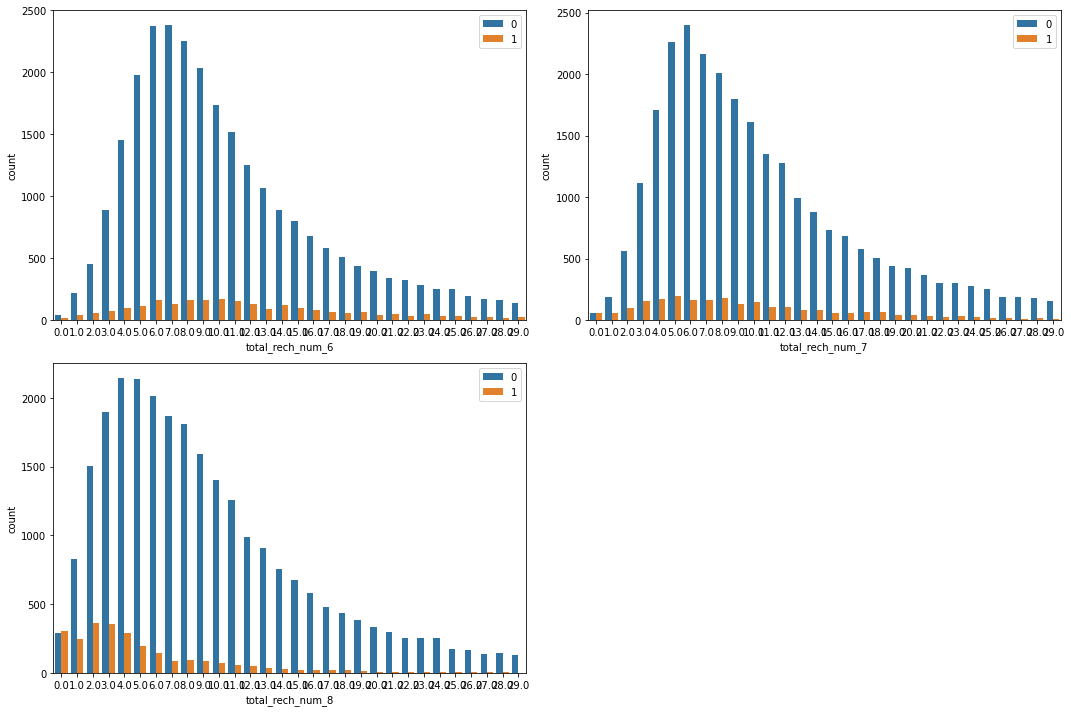

In [0]:
plt.figure(figsize=(15,10))
plt.title("Total Recharge Count")
plt.subplot(2,2,1)
sns.countplot(x=telecom_cleaned[telecom_cleaned['total_rech_num_6']<30]['total_rech_num_6'], hue=telecom_cleaned["churn"])
plt.legend(loc="upper right")
plt.subplot(2,2,2)
sns.countplot(x=telecom_cleaned[telecom_cleaned['total_rech_num_7']<30]['total_rech_num_7'], hue=telecom_cleaned["churn"])
plt.legend(loc="upper right")
plt.subplot(2,2,3)
sns.countplot(x=telecom_cleaned[telecom_cleaned['total_rech_num_8']<30]['total_rech_num_8'], hue=telecom_cleaned["churn"])
plt.legend(loc="upper right")
plt.tight_layout()

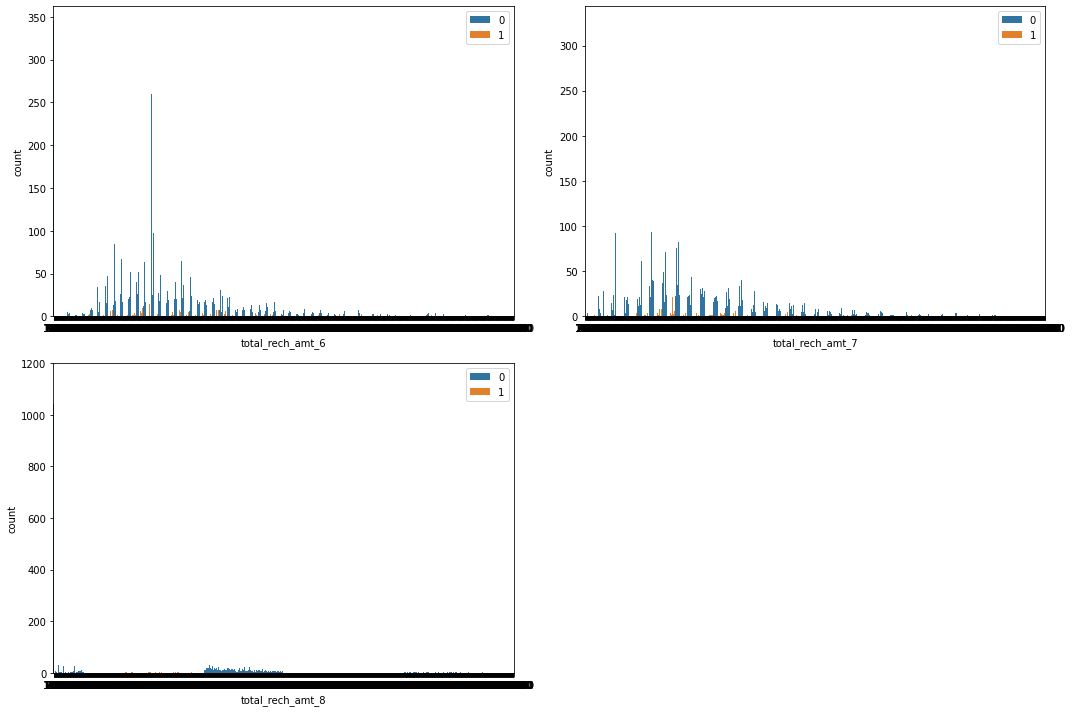

In [0]:
plt.figure(figsize=(15,10))
plt.title("Total Recharge Count")
plt.subplot(2,2,1)
sns.countplot(x=telecom_cleaned['total_rech_amt_6'], hue=telecom_cleaned["churn"])
plt.legend(loc="upper right")
plt.subplot(2,2,2)
sns.countplot(x=telecom_cleaned['total_rech_amt_7'], hue=telecom_cleaned["churn"])
plt.legend(loc="upper right")
plt.subplot(2,2,3)
sns.countplot(x=telecom_cleaned['total_rech_amt_8'], hue=telecom_cleaned["churn"])
plt.legend(loc="upper right")
plt.tight_layout()

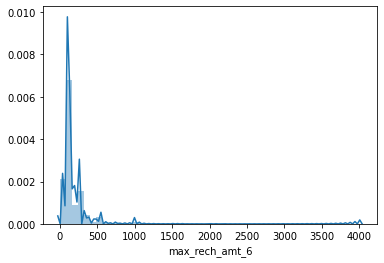

In [0]:
sns.distplot(telecom_cleaned['max_rech_amt_6'])
plt.show()

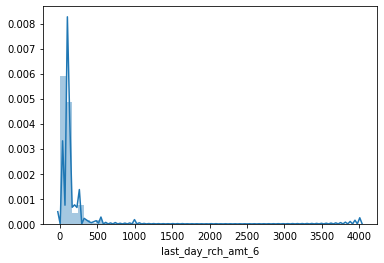

In [0]:
sns.distplot(telecom_cleaned['last_day_rch_amt_6'])
plt.show()

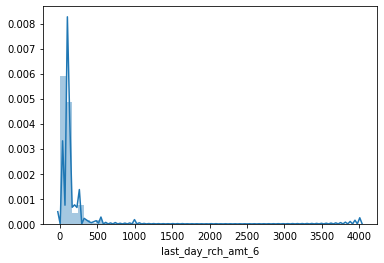

In [0]:
sns.distplot(telecom_cleaned['last_day_rch_amt_6'])
plt.show()

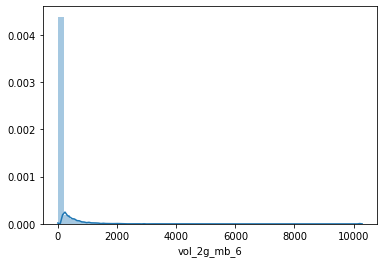

In [0]:
sns.distplot(telecom_cleaned['vol_2g_mb_6'])
plt.show()

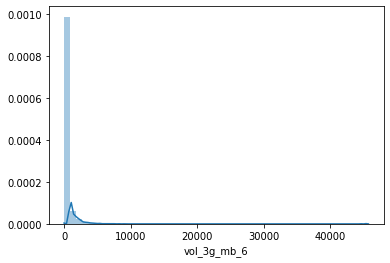

In [0]:
sns.distplot(telecom_cleaned['vol_3g_mb_6'])
plt.show()

In [0]:
telecom_cleaned['monthly_2g_6'].value_counts()

0.0    26682
1.0     2951
2.0      345
3.0       26
4.0        7
Name: monthly_2g_6, dtype: int64

In [0]:
telecom_cleaned['monthly_2g_7'].value_counts()

0.0    26556
1.0     3013
2.0      406
3.0       29
4.0        5
5.0        2
Name: monthly_2g_7, dtype: int64

In [0]:
telecom_cleaned['monthly_2g_8'].value_counts()

0.0    26938
1.0     2761
2.0      283
3.0       22
4.0        5
5.0        2
Name: monthly_2g_8, dtype: int64

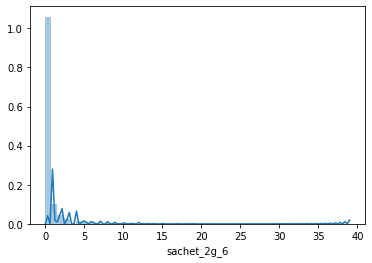

In [0]:
sns.distplot(telecom_cleaned['sachet_2g_6'])
plt.show()

In [0]:
telecom_cleaned['monthly_3g_6'].value_counts()

0.0     26432
1.0      2541
2.0       697
3.0       207
4.0        74
5.0        32
6.0        11
7.0         9
8.0         3
11.0        2
9.0         2
14.0        1
Name: monthly_3g_6, dtype: int64

In [0]:
telecom_cleaned['monthly_3g_7'].value_counts()

0.0     26361
1.0      2466
2.0       822
3.0       207
4.0        68
5.0        39
6.0        23
7.0        10
8.0         5
9.0         4
11.0        2
10.0        1
14.0        1
16.0        1
12.0        1
Name: monthly_3g_7, dtype: int64

In [0]:
telecom_cleaned['monthly_3g_8'].value_counts()

0.0     26526
1.0      2403
2.0       736
3.0       197
4.0        87
5.0        30
6.0        14
7.0         9
9.0         3
8.0         3
10.0        2
16.0        1
Name: monthly_3g_8, dtype: int64

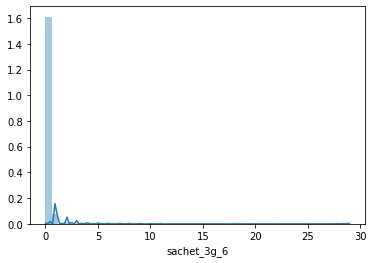

In [0]:
sns.distplot(telecom_cleaned['sachet_3g_6'])
plt.show()

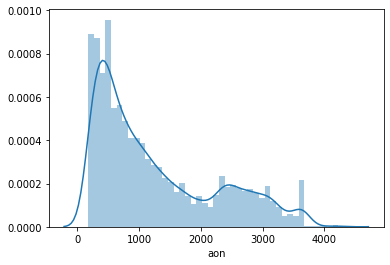

In [0]:
sns.distplot(telecom_cleaned['aon'])
plt.show()

In [0]:
telecom_cleaned['fb_user_6'].value_counts()

-1.0    18614
 1.0    10230
 0.0     1167
Name: fb_user_6, dtype: int64

In [0]:
telecom_cleaned['fb_user_7'].value_counts()

-1.0    18349
 1.0    10377
 0.0     1285
Name: fb_user_7, dtype: int64

In [0]:
telecom_cleaned['fb_user_8'].value_counts()

-1.0    18257
 1.0     9842
 0.0     1912
Name: fb_user_8, dtype: int64

In [0]:
telecom_cleaned['night_pck_user_6'].value_counts()

-1.0    18614
 0.0    11086
 1.0      311
Name: night_pck_user_6, dtype: int64

In [0]:
telecom_cleaned['night_pck_user_7'].value_counts()

-1.0    18349
 0.0    11366
 1.0      296
Name: night_pck_user_7, dtype: int64

In [0]:
telecom_cleaned['night_pck_user_8'].value_counts()

-1.0    18257
 0.0    11475
 1.0      279
Name: night_pck_user_8, dtype: int64

We can see above that the categorical data columns look skewed which is a sign of class imbalance. We will have to treat this after the train-test split is done. Additionally, some of the numerical columns might have outliers.

## Preparing data for modelling

### Outlier treatment

In [0]:
telecom_cleaned.describe(percentiles=[.01, .25, .5, .75, .90, .95, .99, .999])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,avg_rech_amt_6_7,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
count,3.001100e+04,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0

Some of the columns in the dataset contain outliers. We will have to treat them before proceeding further.

In [0]:
#capping the numerical columns at 1 and 99 percentile
for x in telecom_cleaned.columns:
    percentiles = telecom_cleaned[x].quantile([0.01,0.99]).values
    telecom_cleaned[x] = np.clip(telecom_cleaned[x], percentiles[0], percentiles[1])
telecom_cleaned.shape

(30011, 154)

In [0]:
telecom_cleaned.describe(percentiles=[.01, .25, .5, .75, .90, .95, .99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,avg_rech_amt_6_7,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
count,3.001100e+04,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,

Here, we can see that the outliers are treated.

### Splitting data into train-test datasets

In [0]:
from sklearn.model_selection import train_test_split

#storing the feature variables
X = telecom_cleaned.drop(['mobile_number', 'churn'], axis=1)
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,avg_rech_amt_6_7,vbc_3g_8,vbc_3g_7,vbc_3g_6
7,1069.180,1349.8500,1987.9344,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.590,15.740,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,2341.9,1000.0,790.0,951.0,0.0,0.0,619.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,802.0,2370.0,57.74,19.38,18.74
8,378.721,492.2230,137.3620,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.000,0.000,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,315.0,1038.0,21.03,910.65,122.16
13,492.846,205.6710,593.2600,501.76,108.39,534.24,413.31,119.280,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,3

In [0]:
#storing the response variable
y = telecom_cleaned['churn']
y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int64

In [0]:
#splitting the X and y datasets into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [0]:
X_train.shape

(21007, 152)

In [0]:
X_train

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,avg_rech_amt_6_7,vbc_3g_8,vbc_3g_7,vbc_3g_6
4715,331.304,480.315,386.671,336.33,564.78,424.11,154.94,71.08,88.14,0.0,0.00,0.0,0.0,0.00,0.0,1.01,3.26,8.53,1.66,1.93,1.61,0.00,0.00,0.00,9.06,0.00,0.00,2.68,5.19,10.14,335.31,561.51,415.58,124.21,61.89,86.53,0.00,0.00,0.00,0.0,0.0,0.0,459.53,623.41,502.11,0.00,0.00,0.00,32.23,7.25,2.93,0.00,0.0,0.0,494.44,635.86,515.19,2.13,7.410,1.880,9.28,21.31,4.59,0.00,0.00,0.00,11.410,28.73,6.48,71.18,65.58,62.44,41.46,60.36,108.03,0.00,0.00,0.00,0.0,0.0,0.0,112.64,125.94,170.48,124.210,154.68,176.96,0.15,0.0,0.0,0.00,0.000,0.000,0.00,0.00,0.00,19.0,24.0,25.0,370.0,553.0,450.0,30.0,70.0,50.0,0.0,20.0,10.0,0.0,1.0,0.0,0.0,17.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.00,211.20,0.00,0.0,0.0,0.00,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,353.0,923.0,0.00,0.00,0.00
15222,320.013,508.681,480.398,110.08,27.54,131.03,220.86,117.84,168.99,0.0,0.00,0.0,0.0,0.00,0.0,110.08,27.54,131.03,192.11,84.44,110.08,22.74,30.41,55.38,0.00,0.00,0.00,324.94,142.41,296.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6.00,2.98,3.53,0.00,0.0,0.0,330.94,145.39,300.03,19.99,11.640,37.890,481.34,235.29,245.94,94.66,38.53,167.86,596.010,285.48,451.71,3.75,2.93,0.00,0.00,0.00,0.00,0.00,0.98,0.40,0.0,0.0,0.0,3.75,3.91,0.40,607.780,301.91,463.06,0.00,0.0,0.0,8.01,12.510,10.940,0.00,0.00,0.00,5.0,7.0,3.0,290.0,638.0,458.0,110.0,198.0,198.0,110.0,110.0,198.0,0.0,1.0,1.0,0.0,198.0,198.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,198.0,198.0,0.00,8.85,51.46,0.0,91.6,235.69,-1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,1076.0,928.0,170.16,67.21,48.78
60145,289.191,802.774,562.645,26.19,83.34,84.73,206.61,538.99,411.43,0.0,0.00,0.0,0.0,0.00,0.0,26.19,83.34,84.73,202.36,521.28,409.48,4.25,7.53,1.56,

In [0]:
X_test.shape

(9004, 152)

### Handling  class imbalance

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [0]:
X_train.isnull().values.any(),y_train.isnull().values.any()

(False, False)

In [0]:
model = Pipeline([
        ('smote', SMOTE()),
        ('classification', LogisticRegression())
    ])

weight= np.linspace(0.4,0.7,10)
k = np.linspace(100,1000,10,dtype=int)
gs= GridSearchCV(estimator=model, param_grid={"smote__sampling_strategy":weight, "smote__k_neighbors":k}, scoring="f1",  cv=3, return_train_score=True, verbose=1, n_jobs=-1)
result=gs.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.9min finished


In [0]:
smote = SMOTE(random_state= 100, sampling_strategy=result.best_params_["smote__sampling_strategy"],
              k_neighbors=result.best_params_["smote__k_neighbors"])

In [0]:
X_train_res, y_train_res = smote.fit_sample(X_train, y_train.ravel())

In [0]:
X_train = pd.DataFrame(data=X_train_res, columns=X_train.columns)
y_train = pd.DataFrame(data=y_train_res, columns=["Churn"])

In [0]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,avg_rech_amt_6_7,vbc_3g_8,vbc_3g_7,vbc_3g_6
0,331.304,480.315,386.671,336.33,564.78,424.11,154.94,71.08,88.14,0.0,0.0,0.0,0.0,0.0,0.0,1.01,3.26,8.53,1.66,1.93,1.61,0.00,0.00,0.00,9.06,0.0,0.0,2.68,5.19,10.14,335.31,561.51,415.58,124.21,61.89,86.53,0.0,0.00,0.0,0.0,0.0,0.0,459.53,623.41,502.11,0.00,0.00,0.00,32.23,7.25,2.93,0.0,0.0,0.0,494.44,635.86,515.19,2.13,7.41,1.88,9.28,21.31,4.59,0.00,0.00,0.00,11.41,28.73,6.48,71.18,65.58,62.44,41.46,60.36,108.03,0.0,0.00,0.00,0.0,0.0,0.0,112.64,125.94,170.48,124.21,154.68,176.96,0.15,0.0,0.0,0.00,0.000,0.000,0.0,0.00,0.00,19.0,24.0,25.0,370.0,553.0,450.0,30.0,70.0,50.0,0.0,20.0,10.0,0.0,1.0,0.0,0.0,17.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,211.20,0.00,0.0,0.0,0.00,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,353.0,923.0,0.00,0.00,0.00
1,320.013,508.681,480.398,110.08,27.54,131.03,220.86,117.84,168.99,0.0,0.0,0.0,0.0,0.0,0.0,110.08,27.54,131.03,192.11,84.44,110.08,22.74,30.41,55.38,0.00,0.0,0.0,324.94,142.41,296.49,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6.00,2.98,3.53,0.0,0.0,0.0,330.94,145.39,300.03,19.99,11.64,37.89,481.34,235.29,245.94,94.66,38.53,167.86,596.01,285.48,451.71,3.75,2.93,0.00,0.00,0.00,0.00,0.0,0.98,0.40,0.0,0.0,0.0,3.75,3.91,0.40,607.78,301.91,463.06,0.00,0.0,0.0,8.01,12.510,10.940,0.0,0.00,0.00,5.0,7.0,3.0,290.0,638.0,458.0,110.0,198.0,198.0,110.0,110.0,198.0,0.0,1.0,1.0,0.0,198.0,198.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,198.0,198.0,0.0,8.85,51.46,0.0,91.6,235.69,-1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,1076.0,928.0,170.16,67.21,48.78
2,289.191,802.774,562.645,26.19,83.34,84.73,206.61,538.99,411.43,0.0,0.0,0.0,0.0,0.0,0.0,26.19,83.34,84.73,202.36,521.28,409.48,4.25,7.53,1.56,0.00,0.0,0.0,232.81,612.16,495.78,0.00,0.

In [0]:
y_train.head()

,Churn
0,0
1,0
2,0
3,0
4,0


### Scaling the continous variables

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#scaling the continuous columns
X_train_sc = scaler.fit_transform(X_train)
X_train = pd.DataFrame(data= X_train_sc, columns= X_train.columns, index= X_train.index)

## Modelling without PCA

### Feature Selection Using RFE

The total number of features for this analysis is 152. Since the number of variables is extremely high, we can use RFE trim down some of the features and select only some of the important variables for further analysis.

In [0]:
from sklearn.feature_selection import RFE

log_reg = LogisticRegression()
rfe = RFE(log_reg, 15)             # running RFE to filter 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [0]:
rfe.support_

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [0]:
#column name along with their ranking in RFE and selection boolean
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 119),
 ('arpu_7', False, 28),
 ('arpu_8', False, 46),
 ('onnet_mou_6', False, 43),
 ('onnet_mou_7', False, 54),
 ('onnet_mou_8', False, 45),
 ('offnet_mou_6', False, 11),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 17),
 ('roam_ic_mou_6', False, 105),
 ('roam_ic_mou_7', False, 91),
 ('roam_ic_mou_8', False, 120),
 ('roam_og_mou_6', False, 121),
 ('roam_og_mou_7', False, 90),
 ('roam_og_mou_8', False, 20),
 ('loc_og_t2t_mou_6', False, 122),
 ('loc_og_t2t_mou_7', False, 36),
 ('loc_og_t2t_mou_8', False, 19),
 ('loc_og_t2m_mou_6', False, 7),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', False, 38),
 ('loc_og_t2f_mou_6', False, 130),
 ('loc_og_t2f_mou_7', False, 37),
 ('loc_og_t2f_mou_8', False, 39),
 ('loc_og_t2c_mou_6', False, 115),
 ('loc_og_t2c_mou_7', False, 127),
 ('loc_og_t2c_mou_8', False, 74),
 ('loc_og_mou_6', False, 8),
 ('loc_og_mou_7', False, 24),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 9),
 ('std_og_t2t_mou_7', False, 15),


In [0]:
rfe_col = X_train.columns[rfe.support_] #filtering the columns that are selected
rfe_col

Index(['offnet_mou_7', 'loc_og_t2m_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_mou_8',
       'total_og_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8',
       'last_day_rch_amt_8', 'count_rech_2g_6', 'sachet_2g_6', 'fb_user_8'],
      dtype='object')

In [0]:
reject_cols = X_train.columns[~rfe.support_].to_list() #columns that are not selected
reject_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_

Using RFE, we can see that some of the top predictors of the model are offnet_mou_6', 'loc_og_mou_6', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', etc. Hence, we can say that in order to reduce the churn rate, the telecom company might introduce some plans to:

- reduce the local and std outgoing call charges for customers at risk of churning
- reduce incoming charges for roaming calls

### Logistic Regression using RFE

In [0]:
import statsmodels.api as sm

#checking statistics of model created from the features obtained from RFE
X_train_sm = sm.add_constant(X_train[rfe_col])
log_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
stats = log_model.fit()
stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                26857
Model:                            GLM   Df Residuals:                    26841
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9509.9
Date:                Mon, 25 May 2020   Deviance:                       19020.
Time:                        18:11:00   Pearson chi2:                 2.27e+09
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9984      0.030    -67.166      0.000      -2.057      -1.940
offnet_mou_7           1.4402      0.099     14.538      0.000       1.246       1.634
loc_og_t2m_mou_7      -0.7629      0.061    -12.526      0.000      -0.882      -0.643
loc_og_mou_8           2.9383      0.162     18.143      0.000       2.621       3.256
std_og_t2t_mou_8      -1.7775      0.129    -13.775      0.000      -2.030      -1.525
std_og_t2m_mou_7      -0.9056      0.094     -9.683      0.000      -1.089      -0.722
std_og_t2m_mou_8      -2.1368      0.128    -16.689      0.000      -2.388      -1.886
std_og_mou_8           8.9764      0.340     26.365      0.000       8.309       9.644
total_og_mou_8        -7.8648      0.327    -24.026      0.000      -8.506      -7.223
std_ic_mou_8           0.1071      0.038      2.814      0.005       0.032       0.182
total_ic_mou_7         0.7450      0.045     16.641      0.000       0.657       0.833
total_ic_mou_8        -1.8861      0.083    -22.698      0.000      -2.049      -1.723
last_day_rch_amt_8    -0.6337      0.030    -20.968      0.000      -0.693      -0.574
count_rech_2g_6       -0.7988      0.105     -7.584      0.000      -1.005      -0.592
sachet_2g_6            0.8556      0.103      8.300      0.000       0.654       1.058
fb_user_8             -0.5616      0.025    -22.570      0.000      -0.610      -0.513
======================================================================================
"""

In this model, the p-values of all the variables are less than 0.05. This indicates that all the selected variables for this model are significant. Now, we will check for multicollimearity in the model and trim the model accordingly while keeping an eye on the p-values of the variables.

#### Checking VIFs of variables in model

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating separate dataframe with names of all features from RFE variables and their respective VIFs
model_col = ['offnet_mou_7', 'loc_og_t2m_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_mou_8',
             'total_og_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'last_day_rch_amt_8', 'count_rech_2g_6', 'night_pck_user_8', 'sachet_2g_6', 'fb_user_8']
vif = pd.DataFrame()
vif['Features'] = X_train[model_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[model_col].values, i) for i in range(X_train[model_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,std_og_mou_8,107.66
7,total_og_mou_8,49.37
3,std_og_t2t_mou_8,28.95
5,std_og_t2m_mou_8,27.13
0,offnet_mou_7,21.84
4,std_og_t2m_mou_7,20.21
14,fb_user_8,17.68
11,count_rech_2g_6,17.59
12,night_pck_user_8,17.03
2,loc_og_mou_8,16.98


As seen above, some of the columns selected by RFE have an extremely high value for VIF. This means that these columns are multicollinear with the other selected columns. Hence, we will have to drop them one at a time and check the model.

In [0]:
X_train_sm2 = X_train_sm.drop("std_og_mou_8", 1)
log_model2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
stats2 = log_model2.fit()
stats2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                26857
Model:                            GLM   Df Residuals:                    26842
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9812.3
Date:                Mon, 25 May 2020   Deviance:                       19625.
Time:                        18:11:06   Pearson chi2:                 1.23e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.0471      0.030    -67.640      0.000      -2.106      -1.988
offnet_mou_7           1.3451      0.096     14.051      0.000       1.157       1.533
loc_og_t2m_mou_7      -0.7328      0.059    -12.400      0.000      -0.849      -0.617
loc_og_mou_8           0.9584      0.125      7.640      0.000       0.713       1.204
std_og_t2t_mou_8       1.5945      0.136     11.694      0.000       1.327       1.862
std_og_t2m_mou_7      -0.8486      0.091     -9.369      0.000      -1.026      -0.671
std_og_t2m_mou_8       1.1018      0.131      8.421      0.000       0.845       1.358
total_og_mou_8        -3.4626      0.241    -14.345      0.000      -3.936      -2.989
std_ic_mou_8           0.1865      0.038      4.862      0.000       0.111       0.262
total_ic_mou_7         0.7947      0.045     17.820      0.000       0.707       0.882
total_ic_mou_8        -2.2139      0.085    -25.954      0.000      -2.381      -2.047
last_day_rch_amt_8    -0.6484      0.031    -20.912      0.000      -0.709      -0.588
count_rech_2g_6       -0.7468      0.102     -7.292      0.000      -0.948      -0.546
sachet_2g_6            0.8011      0.100      7.989      0.000       0.605       0.998
fb_user_8             -0.5761      0.025    -23.424      0.000      -0.624      -0.528
======================================================================================
"""

In [0]:
#checking the VIFs after dropping the column
model_col.remove('std_og_mou_8')
vif = pd.DataFrame()
vif['Features'] = X_train[model_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[model_col].values, i) for i in range(X_train[model_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_og_mou_8,28.23
0,offnet_mou_7,21.61
4,std_og_t2m_mou_7,19.99
13,fb_user_8,17.68
10,count_rech_2g_6,17.59
11,night_pck_user_8,17.03
12,sachet_2g_6,16.78
5,std_og_t2m_mou_8,10.91
3,std_og_t2t_mou_8,10.88
2,loc_og_mou_8,10.75


In [0]:
X_train_sm3 = X_train_sm2.drop("total_og_mou_8", 1)
log_model3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
stats3 = log_model3.fit()
stats3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                26857
Model:                            GLM   Df Residuals:                    26843
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9947.8
Date:                Mon, 25 May 2020   Deviance:                       19896.
Time:                        18:11:09   Pearson chi2:                 3.51e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.0686      0.031    -66.878      0.000      -2.129      -2.008
offnet_mou_7           1.0751      0.090     11.925      0.000       0.898       1.252
loc_og_t2m_mou_7      -0.6049      0.056    -10.782      0.000      -0.715      -0.495
loc_og_mou_8          -0.5977      0.056    -10.616      0.000      -0.708      -0.487
std_og_t2t_mou_8      -0.3589      0.023    -15.556      0.000      -0.404      -0.314
std_og_t2m_mou_7      -0.6120      0.086     -7.133      0.000      -0.780      -0.444
std_og_t2m_mou_8      -0.7230      0.037    -19.315      0.000      -0.796      -0.650
std_ic_mou_8           0.2809      0.038      7.366      0.000       0.206       0.356
total_ic_mou_7         0.8577      0.044     19.305      0.000       0.771       0.945
total_ic_mou_8        -2.6096      0.083    -31.558      0.000      -2.772      -2.447
last_day_rch_amt_8    -0.6970      0.031    -22.154      0.000      -0.759      -0.635
count_rech_2g_6       -0.7128      0.101     -7.054      0.000      -0.911      -0.515
sachet_2g_6            0.7646      0.099      7.731      0.000       0.571       0.958
fb_user_8             -0.6050      0.025    -24.633      0.000      -0.653      -0.557
======================================================================================
"""

In [0]:
model_col.remove('total_og_mou_8')
vif = pd.DataFrame()
vif['Features'] = X_train[model_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[model_col].values, i) for i in range(X_train[model_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,offnet_mou_7,20.81
4,std_og_t2m_mou_7,19.36
12,fb_user_8,17.67
9,count_rech_2g_6,17.59
10,night_pck_user_8,17.02
11,sachet_2g_6,16.78
1,loc_og_t2m_mou_7,7.02
7,total_ic_mou_8,3.77
6,total_ic_mou_7,3.39
2,loc_og_mou_8,2.46


In [0]:
X_train_sm4 = X_train_sm3.drop("offnet_mou_7", 1)
log_model4 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial())
stats4 = log_model4.fit()
stats4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                26857
Model:                            GLM   Df Residuals:                    26844
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10020.
Date:                Mon, 25 May 2020   Deviance:                       20040.
Time:                        18:11:12   Pearson chi2:                 3.35e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.0694      0.031    -66.958      0.000      -2.130      -2.009
loc_og_t2m_mou_7      -0.1046      0.037     -2.855      0.004      -0.176      -0.033
loc_og_mou_8          -0.5861      0.056    -10.419      0.000      -0.696      -0.476
std_og_t2t_mou_8      -0.3842      0.023    -16.612      0.000      -0.430      -0.339
std_og_t2m_mou_7       0.3509      0.029     12.141      0.000       0.294       0.408
std_og_t2m_mou_8      -0.7270      0.037    -19.456      0.000      -0.800      -0.654
std_ic_mou_8           0.3157      0.038      8.346      0.000       0.242       0.390
total_ic_mou_7         0.8498      0.044     19.228      0.000       0.763       0.936
total_ic_mou_8        -2.6636      0.083    -32.203      0.000      -2.826      -2.501
last_day_rch_amt_8    -0.6256      0.030    -20.550      0.000      -0.685      -0.566
count_rech_2g_6       -0.7210      0.100     -7.178      0.000      -0.918      -0.524
sachet_2g_6            0.7699      0.098      7.829      0.000       0.577       0.963
fb_user_8             -0.6094      0.024    -24.944      0.000      -0.657      -0.562
======================================================================================
"""

In [0]:
model_col.remove('offnet_mou_7')
vif = pd.DataFrame()
vif['Features'] = X_train[model_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[model_col].values, i) for i in range(X_train[model_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,fb_user_8,17.67
8,count_rech_2g_6,17.59
9,night_pck_user_8,17.02
10,sachet_2g_6,16.77
6,total_ic_mou_8,3.77
5,total_ic_mou_7,3.39
1,loc_og_mou_8,2.46
3,std_og_t2m_mou_7,2.41
4,std_og_t2m_mou_8,2.41
0,loc_og_t2m_mou_7,2.25


In [0]:
X_train_sm5 = X_train_sm4.drop("count_rech_2g_6", 1)
log_model5 = sm.GLM(y_train,X_train_sm5, family = sm.families.Binomial())
stats5 = log_model5.fit()
stats5.summary()	

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                26857
Model:                            GLM   Df Residuals:                    26845
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10048.
Date:                Mon, 25 May 2020   Deviance:                       20097.
Time:                        18:11:15   Pearson chi2:                 2.26e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.0606      0.031    -66.919      0.000      -2.121      -2.000
loc_og_t2m_mou_7      -0.0984      0.037     -2.689      0.007      -0.170      -0.027
loc_og_mou_8          -0.5814      0.056    -10.337      0.000      -0.692      -0.471
std_og_t2t_mou_8      -0.3750      0.023    -16.285      0.000      -0.420      -0.330
std_og_t2m_mou_7       0.3592      0.029     12.412      0.000       0.302       0.416
std_og_t2m_mou_8      -0.7248      0.037    -19.407      0.000      -0.798      -0.652
std_ic_mou_8           0.3230      0.038      8.557      0.000       0.249       0.397
total_ic_mou_7         0.8388      0.044     18.920      0.000       0.752       0.926
total_ic_mou_8        -2.6680      0.083    -32.218      0.000      -2.830      -2.506
last_day_rch_amt_8    -0.6302      0.031    -20.644      0.000      -0.690      -0.570
sachet_2g_6            0.0796      0.019      4.270      0.000       0.043       0.116
fb_user_8             -0.6500      0.024    -27.236      0.000      -0.697      -0.603
======================================================================================
"""

In [0]:
model_col.remove('count_rech_2g_6')
vif = pd.DataFrame()
vif['Features'] = X_train[model_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[model_col].values, i) for i in range(X_train[model_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,fb_user_8,17.15
8,night_pck_user_8,16.88
6,total_ic_mou_8,3.77
5,total_ic_mou_7,3.39
1,loc_og_mou_8,2.46
4,std_og_t2m_mou_8,2.41
3,std_og_t2m_mou_7,2.40
0,loc_og_t2m_mou_7,2.25
7,last_day_rch_amt_8,1.16
9,sachet_2g_6,1.11


Now, we can see that the features of this model are significant and the VIFs are also less than 4. So, we will retain this model.

In [0]:
#predicting probability on the basis of the train dataset
y_train_pred = stats5.predict(X_train_sm5)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.43037127, 0.00329669, 0.01599538, 0.19361254, 0.26844438,
       0.06126694, 0.09165799, 0.01960924, 0.10531772, 0.03962098])

In [0]:
#creating a dataframe with the churn probability and the 'churn' column of the original dataset
y_train_pred_final = pd.DataFrame({'churn':y_train.values.reshape(-1), 'churn_prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final['score'] = y_train_pred_final['churn_prob']*100
y_train_pred_final = y_train_pred_final[['ID','churn','churn_prob','score']]
y_train_pred_final.head(10)

,ID,churn,churn_prob,score
0,0,0,0.430371,43.037127
1,1,0,0.003297,0.329669
2,2,0,0.015995,1.599538
3,3,0,0.193613,19.361254
4,4,0,0.268444,26.844438
5,5,0,0.061267,6.126694
6,6,0,0.091658,9.165799
7,7,0,0.019609,1.960924
8,8,0,0.105318,10.531772
9,9,0,0.039621,3.962098


#### Determining probability cut-off

In [0]:
#dataframe using different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,ID,churn,churn_prob,score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0,0.430371,43.037127,1,1,1,1,1,0,0,0,0,0
1,1,0,0.003297,0.329669,1,0,0,0,0,0,0,0,0,0
2,2,0,0.015995,1.599538,1,0,0,0,0,0,0,0,0,0
3,3,0,0.193613,19.361254,1,1,0,0,0,0,0,0,0,0
4,4,0,0.268444,26.844438,1,1,1,0,0,0,0,0,0,0


In [0]:
#dataframe with accuracy, sensitivity, and specificity across various probability cut-offs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn import metrics
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.285698  1.000000  0.000000
0.1   0.1  0.660051  0.935879  0.549729
0.2   0.2  0.756004  0.885051  0.704389
0.3   0.3  0.813792  0.838785  0.803795
0.4   0.4  0.846707  0.787176  0.870517
0.5   0.5  0.859292  0.728138  0.911749
0.6   0.6  0.856201  0.642513  0.941670
0.7   0.7  0.821722  0.455493  0.968203
0.8   0.8  0.746025  0.139320  0.988688
0.9   0.9  0.720222  0.026326  0.997759


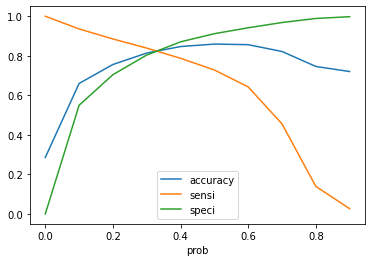

In [0]:
# plotting the accuracy, sensitivity and specificity dataframe
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The accuracy, sensitivity and specificity curves seem to intersect at the probability cut-off of 0.35. Hence, this probability cut-off seems to be the optimum for this model.

In [0]:
y_train_pred_final['churn_pred'] = y_train_pred_final.churn_prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,ID,churn,churn_prob,score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,churn_pred
0,0,0,0.430371,43.037127,1,1,1,1,1,0,0,0,0,0,1
1,1,0,0.003297,0.329669,1,0,0,0,0,0,0,0,0,0,0
2,2,0,0.015995,1.599538,1,0,0,0,0,0,0,0,0,0,0
3,3,0,0.193613,19.361254,1,1,0,0,0,0,0,0,0,0,0
4,4,0,0.268444,26.844438,1,1,1,0,0,0,0,0,0,0,0


In [0]:
#checking accuracy
print("The accuracy of the model is:" , metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.churn_pred))

The accuracy of the model is: 0.8255948169937074


In [0]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.churn_pred)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print(confusion)
print(TP / float(TP+FN)) #sensitivity of model
print(TN / float(TN+FP)) #specificity of model

[[15856  3328]
 [ 1356  6317]]
0.8232764238237977
0.8265221017514596


#### Making predictions based on test dataset

In [0]:

X_test_sc = scaler.transform(X_test)
X_test = pd.DataFrame(data= X_test_sc, columns= X_test.columns, index= X_test.index)
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,avg_rech_amt_6_7,vbc_3g_8,vbc_3g_7,vbc_3g_6
29360,0.810871,-0.671099,-1.214567,-0.692128,-0.633657,-0.602860,3.482145,0.349035,-0.829853,-0.311416,-0.301343,-0.323287,-0.336647,-0.333017,-0.347078,-0.423543,-0.421544,-0.489607,-0.233039,-0.464170,-0.717345,-0.318609,-0.116380,-0.396930,-0.114334,-0.364132,-0.343038,-0.389795,-0.530766,-0.725975,-0.542639,-0.490627,-0.442757,4.199973,0.710359,-0.474633,-0.242496,-0.239366,-0.226203,0.0,0.0,0.0,2.387067,0.142068,-0.588679,-0.184911,-0.180239,-0.159163,-0.044766,-0.319612,-0.260900,2.122800,0.0,-0.16442,2.021182,-0.139795,-0.854013,-0.081379,0.178797,-0.332379,0.123753,0.171960,0.140465,-0.292564,0.361810,-0.031659,0.001957,0.198602,-0.048813,-0.438694,-0.423141,-0.181559,0.576817,0.075563,0.423593,-0.278752,-0.272712,-0.266578,0.0,0.0,0.0,0.172318,-0.160661,0.164992,0.001292,0.071825,-0.022250,-0.462300,-0.213778,-0.260972,-0.272615,-0.278377,-0.251388,-0.266035,-0.265758,-0.252187,2.022306,-0.319613,-1.092091,0.786241,-0.739534,-1.147618,-0.294845,-0.359272,-0.986117,-0.663380,-0.875263,-0.734098,-0.507161,-0.495952,-0.483460,-0.557262,-0.551983,-0.508232,-0.413401,-0.413559,-0.405166,-0.375475,-0.355157,-0.322885,-0.527411,-0.518885,-0.479915,-0.335019,-0.319871,-0.289586,-0.364393,-0.367749,-0.342874,-0.747606,-0.758809,-0.721362,-0.318535,-0.317656,-0.287929,-0.343680,-0.347155,-0.349972,-0.317982,-0.317460,-0.294723,-0.237485,-0.231049,-0.199698,-0.745643,-0.741096,-0.695978,-0.677761,0.008490,-0.340871,-0.349405,-0.344440
49979,0.285686,0.275212,-0.747189,2.010798,2.569513,0.079926,0.059501,-0.166010,-0.656336,-0.311416,-0.289269,-0.295883,-0.336647,-0.318528,-0.280482,-0.213645,-0.280508,-0.219370,-0.778673,-0.680481,-0.713943,-0.413837,-0.414086,-0.396930,0.142540,-0.364132,-0.343038,-0.646915,-0.615297,-0.601863,2.377748,3.038

In [0]:
X_test_temp = X_test[model_col] #filtering dataset using required variables
X_test_temp.head()

,loc_og_t2m_mou_7,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_7,std_og_t2m_mou_8,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_8,night_pck_user_8,sachet_2g_6,fb_user_8
29360,-0.464170,-0.725975,-0.442757,0.710359,-0.474633,0.071825,-0.022250,-0.734098,-0.721362,-0.343680,-0.695978
49979,-0.680481,-0.601863,0.220088,0.241182,-0.309817,-0.067265,-0.745720,1.654673,-0.721362,0.417279,-0.695978
90612,-0.719703,-0.601726,-0.446558,-0.566463,-0.485679,-0.523682,-0.164241,1.673783,1.434145,-0.343680,1.588810
87007,0.852407,0.015336,-0.446558,-0.463899,-0.485679,0.387230,0.154900,-0.447445,-0.721362,-0.343680,-0.695978
91852,-0.778045,4.453289,-0.446558,-0.565595,-0.481492,-0.282756,-0.230065,-0.514331,-0.721362,-0.343680,-0.695978


In [0]:
X_test_sm = sm.add_constant(X_test_temp)
y_test_pred = stats5.predict(X_test_sm) #making predictions on test dataset using the final model
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
29360,0.882376
49979,0.003924
90612,0.000316
87007,0.628998
91852,0.091772


In [0]:
#prediction final dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df['ID'] = y_test_df.index
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

,churn,ID,0
0,0,29360,0.882376
1,0,49979,0.003924
2,0,90612,0.000316
3,0,87007,0.628998
4,0,91852,0.091772


In [0]:
#renaming the probability column and rearranging similar to train dataset
y_pred_final= y_pred_final.rename(columns={ 0 : 'churn_prob'})
y_pred_final["score"] = y_pred_final["churn_prob"]*100
y_pred_final['churn_pred'] = y_pred_final.churn_prob.map(lambda x: 1 if x > 0.1 else 0)
y_pred_final = y_pred_final[['ID','churn','churn_prob','score','churn_pred']]
y_pred_final.head()

,ID,churn,churn_prob,score,churn_pred
0,29360,0,0.882376,88.237566,1
1,49979,0,0.003924,0.392416,0
2,90612,0,0.000316,0.031574,0
3,87007,0,0.628998,62.899781,1
4,91852,0,0.091772,9.177186,0


In [0]:
#checking accuracy of test dataset
metrics.accuracy_score(y_pred_final.churn, y_pred_final.churn_pred)

0.5665259884495779

In [0]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.churn_pred)
confusion2

array([[4453, 3781],
       [ 122,  648]])

In [0]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

print(TP / float(TP+FN)) #sensitivity of model
print(TN / float(TN+FP)) #specificity of model

0.8415584415584415
0.54080641243624


Even though this does not seem to be a good model due to the fact that there is a huge difference between the accuracies of the train and test dataset, it offers more interpretability. In this model, we can see that the customers are assigned a churn probability. Using the cut-off probability, we can decide whether a customer will churn or not. This cut-off can even be adjusted as per the business requirement. Additionally, we can also see the top variables that drive the churn.

## Modelling with PCA

### PCA

In [0]:
from sklearn.decomposition import PCA
pca=PCA(svd_solver="auto", random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [0]:
pca.components_

array([[ 5.16300513e-02,  7.45454044e-02,  9.86522438e-02, ...,
         1.34600156e-01,  1.33036639e-01,  1.24907519e-01],
       [ 9.02869373e-02,  1.15190475e-01,  1.21589895e-01, ...,
        -4.97144080e-02, -5.96730979e-02, -6.13927874e-02],
       [ 1.16923575e-01,  1.68052769e-01,  1.39759008e-01, ...,
         3.52448620e-02,  3.34619849e-02,  2.74214466e-02],
       ...,
       [-0.00000000e+00,  4.91965764e-17, -6.91176068e-17, ...,
        -3.31602458e-17,  2.16636596e-16, -1.54000918e-16],
       [ 0.00000000e+00,  1.72456999e-17,  1.96545501e-17, ...,
        -1.27307838e-17, -3.65846840e-17, -1.34789813e-16],
       [-0.00000000e+00,  9.36653849e-17,  2.40368525e-17, ...,
         9.90499995e-17, -7.25363748e-17,  2.68473315e-17]])

In [0]:
evr=pca.explained_variance_ratio_

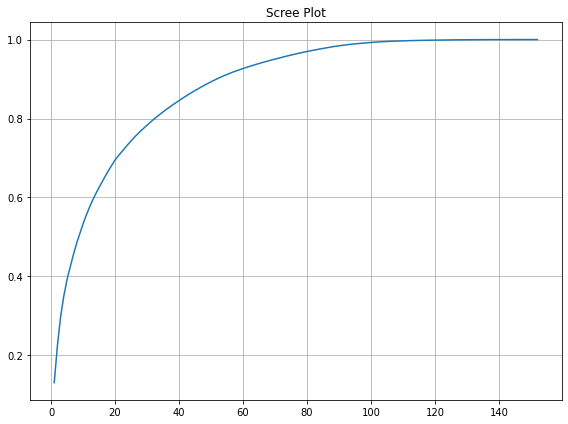

In [0]:
#plotting cumulative variance of components
plt.figure(figsize=(8,6))
plt.grid()
plt.title("Scree Plot")
plt.plot([i for i in range(1,len(evr)+1)], np.cumsum(evr))
plt.tight_layout()

In [0]:
pca=PCA(80,svd_solver="auto", random_state=42)
bar=pca.fit_transform(X_train)
foo=pd.DataFrame(columns=["pca"+str(i) for i in range(1,81)], data=bar, index=X_train.index)
foo.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47,pca48,pca49,pca50,pca51,pca52,pca53,pca54,pca55,pca56,pca57,pca58,pca59,pca60,pca61,pca62,pca63,pca64,pca65,pca66,pca67,pca68,pca69,pca70,pca71,pca72,pca73,pca74,pca75,pca76,pca77,pca78,pca79,pca80
0,-3.296894,-1.394182,2.043704,0.877494,3.031094,2.752584,0.025476,-1.002857,-0.499131,0.214999,0.095951,-0.003055,1.287721,1.325027,-1.383369,0.537845,0.927397,-0.256870,1.181224,-0.753896,0.503855,-0.246697,0.758436,-1.047320,0.859128,0.542663,-0.138114,-0.298667,0.513708,-0.539742,1.385392,-1.757486,-0.823126,0.457076,-0.512048,0.527823,0.456394,-1.705119,0.244420,-0.584238,0.101493,-0.732668,-0.672144,-0.393376,0.191201,-0.239781,0.993592,-0.625436,-0.799840,0.553481,0.351466,-0.407641,0.294820,-0.219703,0.037367,-0.155899,-0.439039,-0.004420,0.096218,-0.029849,0.014997,-0.148932,0.065044,-0.054670,0.759167,0.541458,-0.138508,-1.282543,-0.704065,-0.079118,-0.469353,-0.407394,0.235529,-0.107943,-0.001820,0.103822,0.177724,0.182363,-0.044417,-0.188742
1,3.479061,0.492242,-4.318858,0.113232,-0.097751,0.593693,-2.808267,-0.183743,2.535259,-1.647188,-0.508972,-3.563008,-0.922670,0.243431,1.068840,-2.559459,1.003551,-2.294087,2.788688,-0.188443,-1.052571,0.089238,1.482010,-0.133442,0.563951,0.134188,-1.386057,-0.588564,0.210444,-0.701686,-0.609163,-0.759167,-0.070120,0.051993,-0.024630,-0.038034,-0.888318,-0.514459,-0.943507,0.056699,-1.699396,-1.701352,0.730856,0.066212,0.522508,0.093502,0.081922,0.510327,-0.143584,0.871021,-0.306280,-0.269595,0.655092,0.279096,-0.747814,0.863365,-0.369439,-0.447269,-1.559326,0.787188,0.888802,-0.628462,0.213457,0.728657,-0.354625,-0.377569,0.476179,0.359723,-1.211007,-0.191828,-0.415517,-0.589842,0.063784,-0.801622,1.348160,-1.405700,0.092815,-1.038260,0.182209,0.210029
2,-0.253029,2.973799,-3.473021,-0.046737,1.240278,-0.655024,-1.691826,-0.013370,1.620904,5.799368,7.503103,1.797253,-1.174864,-1.065026,1.727028,2.629770,-1.574237,-3.256715,0.083054,-0.851320,-3.901907,-2.767296,-2.583230,-3.721228,-0.355608,-0.078695,1.244580,-1.651750,-3.810799,-0.586664,-1.063312,-1.378460,1.143138,0.672369,0.697432,-0.141488,1.174365,0.179701,0.303357,-0.520925,0.089223,0.454879,-0.753431,-0.414314,0.119422,-0.198094,-0.089501,0.016894,0.062855,-0.030900,0.037436,-0.411444,0.215251,0.126141,0.093670,0.021383,0.371903,0.733112,1.045250,-0.192817,-0.180833,-0.473683,-0.082401,-0.044122,-0.072745,-0.637130,-0.142513,-0.034447,-0.094735,0.139014,-0.022513,-0.223936,-0.100958,-0.050277,-0.179155,0.454740,0.927677,0.304576,-0.097135,-0.011452
3,-3.072234,1.470925,0.611622,0.081056,-0.436657,-1.188351,-0.958777,-1.305877,-0.972916,-0.401491,-0.511337,2.509364,-0.114416,-0.220733,-0.012263,-0.231661,-0.390569,-0.143273,2.099475,-0.856152,-0.868451,0.621278,0.020420,-0.590767,-0.369183,0.048722,0.307406,0.858409,0.083221,0.537324,-0.386994,-0.295164,-0.514881,0.195930,-0.316876,0.464601,0.655543,-0.260946,-0.321299,0.829234,-0.290927,1.006201,0.022030,-0.561881,0.212109,-0.148109,-0.287570,0.269998,0.212475,0.245070,0.021035,-0.112910,0.120228,-0.034398,0.039895,0.341617,-0.232154,0.346317,1.093172,-0.196390,-0.058101,0.215208,0.211003,0.055052,-0.071431,-0.033974,0.214917,-0.572679,0.987705,-0.251579,-0.608245,0.093820,-0.223307,-0.075668,0.395871,-0.172617,-0.270775,-0.150490,-0.031219,0.100691
4,-3.116305,0.293707,-0.743179,0.616450,0.653587,-0.565567,0.859477,-1.509415,-0.511761,1.036841,0.504983,0.236340,0.014209,0.582062,0.766446,1.282067,0.231954,0.198955,1.209746,-1.156563,3.373526,0.586089,0.875593,1.577607,-0.393828,-0.228041,-0.405736,-1.647455,-2.018381,0.017331,0.318445,-0.355328,1.621828,-0.877796,2.253205,2.776476,1.044068,-0.120692,0.968374,-0.188864,-0.882872,-0.069245,-1.081007,-0.139982,-0.214417,-0.039855,-0.129259,-0.167941,-0.0931

### Logistic Regression

In [0]:
lr=LogisticRegression(random_state=100)
lrfit=lr.fit(foo,y_train)

In [0]:
y_train_pred_lr = lrfit.predict(foo)

In [0]:
y_train_pred_lr = pd.DataFrame({"Train_Churn_pred":y_train_pred_lr, "Train_churn":y_train.Churn.values})
y_train_pred_lr.head()

,Train_Churn_pred,Train_churn
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [0]:
confusion_matrix(y_train_pred_lr.Train_churn, y_train_pred_lr.Train_Churn_pred)

array([[17561,  1623],
       [ 2045,  5628]])

In [0]:
from sklearn.metrics import accuracy_score
print("The accuracy score of the model is:" , accuracy_score(y_train_pred_lr.Train_churn, y_train_pred_lr.Train_Churn_pred))

The accuracy score of the model is: 0.8634248054510928


#### Making predictions based on test dataset

In [0]:
X_test_sc= scaler.transform(X_test) #scaling the test dataset

In [0]:
#applying pca on the test dataset
bar=pca.transform(X_test_sc)
foo_test=pd.DataFrame(columns=["pca"+str(i) for i in range(1,81)], data=bar, index=X_test.index)
foo_test.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47,pca48,pca49,pca50,pca51,pca52,pca53,pca54,pca55,pca56,pca57,pca58,pca59,pca60,pca61,pca62,pca63,pca64,pca65,pca66,pca67,pca68,pca69,pca70,pca71,pca72,pca73,pca74,pca75,pca76,pca77,pca78,pca79,pca80
29360,-5.596484,-3.195988,-3.144902,1.160522,0.071630,2.302059,-5.739876,-1.794334,-3.231707,-2.659327,-0.287574,0.047121,-2.448484,1.540318,4.257168,0.254245,3.577000,-0.951126,1.975926,0.723370,-6.374426,-5.528165,7.595785,-8.531752,-7.696080,10.801442,17.467654,-21.626163,1.116357,-4.447339,12.077849,4.327409,-3.221610,-47.670502,-37.843843,14.728616,-4.572536,11.603243,-2.899846,-3.289578,-1.485301,6.326454,1.418378,-0.175381,3.770122,-6.343875,0.194608,7.710731,0.831011,-1.470356,-0.187503,-3.575413,2.334700,5.097154,1.803936,-0.512681,-0.132720,-4.655101,0.246775,1.359906,-1.122942,0.269107,-0.326043,0.878114,0.423130,-1.759598,-1.051768,-0.962409,1.181651,1.791551,0.592021,-0.225112,-2.104708,2.032283,0.507175,1.960805,-2.497327,-1.056793,-1.370362,-1.145212
49979,-4.424830,-3.934873,-2.822669,1.702873,0.320292,2.204032,-5.449016,-1.372957,-2.654998,-3.318012,-0.314024,0.253218,-2.428105,0.884575,3.317244,0.511796,2.288640,-0.633104,1.794879,0.631330,-6.680765,-5.443070,6.994162,-8.490996,-8.383282,11.425501,16.748294,-22.280432,1.849697,-5.015787,12.209988,5.055775,-2.967277,-47.620939,-38.107699,15.279140,-3.739452,11.419531,-2.634838,-2.913662,-0.960631,6.223794,1.203578,-0.043675,3.154961,-6.312374,0.135276,6.343757,0.398339,-1.137808,0.655160,-3.718096,2.318063,5.002062,1.612944,-0.362533,0.014987,-4.146444,0.258788,2.107394,-1.750152,0.681309,0.370571,-0.325312,-0.268945,-2.353964,-2.023853,-0.386240,1.596615,1.716350,0.904479,-0.198357,-1.859589,2.156083,0.592684,2.637088,-2.610368,-2.426176,-1.463033,-0.745120
90612,1.262962,-6.687715,-0.843361,-0.323956,-0.975833,3.033278,-5.148899,-3.527548,-4.143959,-2.590139,-0.722666,0.626985,-3.152184,1.593928,5.802164,-0.520355,3.549231,-1.542141,1.262515,0.167768,-5.217287,-3.048980,5.077585,-12.395195,-7.991691,11.211979,13.746977,-23.852171,3.380754,-6.437689,12.190731,6.112945,-3.656707,-47.568860,-37.991750,15.706363,-3.999018,11.602750,-2.418265,-3.041095,-1.200503,6.665416,1.172692,-0.524805,4.165425,-6.856108,1.104562,6.356146,-1.084056,-1.273778,0.314241,-4.336562,1.995681,4.646553,0.035061,0.398360,0.542757,-4.944982,0.599860,-0.227958,-1.430191,0.531113,-0.070726,0.904788,0.621227,-1.986275,-1.519345,-0.700391,1.320939,0.682811,1.505680,-0.302861,-2.631208,-1.522809,-3.101787,-0.175228,-1.861296,-3.433334,-0.574556,-1.839838
87007,-5.565055,-3.151447,-3.077008,1.224011,0.066256,2.305320,-5.886567,-1.794740,-3.282216,-2.575219,-0.298122,0.003343,-2.502860,1.536207,4.259777,0.314417,3.591079,-0.937987,2.162227,0.623739,-6.321037,-5.612235,7.494807,-8.531858,-7.700012,10.749229,17.437027,-21.525434,1.040124,-4.441646,12.104534,4.486887,-3.262884,-47.770123,-37.867296,14.884076,-4.262117,11.428767,-2.888076,-3.143730,-1.487587,6.133911,1.418019,-0.151831,3.661395,-6.327146,0.197926,7.599431,0.718034,-1.276774,-0.007586,-3.653327,2.463446,4.882813,1.882539,-0.632151,-0.186684,-4.660244,0.253468,1.357693,-1.123001,0.257560,-0.323348,0.863740,0.447233,-1.786875,-1.050746,-0.999115,1.168192,1.769500,0.611008,-0.194696,-2.094279,2.054836,0.428569,1.960145,-2.470558,-1.107960,-1.365635,-1.129222
91852,-5.603914,-3.099140,-3.214488,1.279039,0.050434,2.446804,-5.746665,-1.910512,-3.155295,-2.411977,-0.089159,0.237164,-2.320151,1.683899,4.440051,0.394390,3.071179,-1.445099,1.719032,0.397417,-3.529310,-4.640041,8.550496,-6.509609,-8.314498,11.697081,16.152578,-23.443458,-0.913486,-3.881689,12.610948,4.750908,-2.927565,-47.926411,-37.415479,14.277078,-3.786004,11.542288,-2.292636,-3.115475,-2.039373,5.800775,-2.9

In [0]:
y_test_pred_lr = lrfit.predict(foo_test) #predicting test data based on logistic regression model

In [0]:
y_test_pred_lr = pd.DataFrame({"Test_Churn_pred":y_test_pred_lr, "Test_churn":y_test.ravel()})
y_test_pred_lr.head()

,Test_Churn_pred,Test_churn
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [0]:
confusion_matrix(y_test_pred_lr.Test_churn, y_test_pred_lr.Test_Churn_pred)

array([[8181,   53],
       [ 702,   68]])

In [0]:
print("The accuracy based on this model is:", accuracy_score(y_test_pred_lr.Test_churn, y_test_pred_lr.Test_Churn_pred))

The accuracy based on this model is: 0.9161483784984451


We can see above that even though the interpretability in such a model is low, we can get a high accuracy on the test datasets which, in turn, help us better determine if a customer is going to churn or not.

### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
param_grid = {
    'max_depth': range(5 , 100 ,20),
    'min_samples_leaf': range(100, 400, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [100,300, 500], 
    #'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring="f1", return_train_score = True,
                          cv = 3, n_jobs = -1,verbose = 1)

In [0]:
gs_result=grid_search.fit(foo, y_train)

Fitting 3 folds for each of 135 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.2min


In [0]:
 max_depth=gs_result.best_params_["max_depth"]
 min_sample_leaf= gs_result.best_params_["min_samples_leaf"]
 min_samples_split= gs_result.best_params_["min_samples_split"]
 n_estimators = gs_result.best_params_["n_estimators"]

In [0]:
rfc_train=RandomForestClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, n_estimators=n_estimators)
rfc_train_fit = rfc_train(foo, y_train)
rfc_train_result= rfc_train_fit.predict(foo)

In [0]:
print(classification_report(y_train, rfc_train_result))
print ("Accuracy is ", round(accuracy_score(y_test, rfc_train_result)*100, 2))

In [0]:
rfc_test_result= rfc_train_fit.predict(foo_test)
print(classification_report(y_test, rfc_test_result))

In [0]:
print ("Accuracy is ", round(accuracy_score(y_test, rfc_test_result)*100, 2))

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_default))

### Decision Tree

In [0]:
#import
from sklearn.tree import DecisionTreeClassifier

In [152]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(6,9),
    'min_samples_leaf': range(79, 81),
    'min_samples_split': range(39,41),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, n_jobs=-1, return_train_score=True, scoring="accuracy")

# Fit the grid search to the data
gs_dt_result = grid_search.fit(foo, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min


KeyboardInterrupt: ignored

In [0]:
gs_dt_result.best_params_ #checking best parameters of tree

In [0]:
max_depth=gs_dt_result.best_params_["max_depth"]
min_samples_leaf = gs_dt_result.best_params_["min_samples_leaf"]
min_samples_split = gs_dt_result.best_params_ ["min_samples_split"]
criterion = gs_dt_result.best_params_["criterion"]

In [0]:
tree=DecisionTreeClassifier(n_fe, max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split,criterion=criterion)

In [0]:
tree_fit = tree.fit(foo, y_train)
tree_train_pred = tree_fit.predict(foo)

In [0]:
print(classification_report(y_train, tree_train_pred))

In [0]:
print ("Accuracy is ", round(accuracy_score(y_train, tree_train_pred)*100, 2))

In [0]:
tree_test_pred= tree_fit.predict(foo_test)

In [0]:
print(classification_report(y_test, tree_test_pred))

In [0]:
print ("Accuracy is ", round(accuracy_score(y_test, tree_test_pred)*100, 2))

As we can see, the models using PCA provide more accuracy on unseen data as compared to models without PCA.